#Loading IRIS dataset

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
print(X.shape, y.shape)

(150, 4) (150,)


In [5]:
print(X[:5], y[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]] [0 0 0 0 0]


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#We will be using Random Forest Classfier

In [7]:
# Define the random forest classifier
rf_classifier = RandomForestClassifier()

#GRID Search

In [8]:
# Define hyperparameters grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

In [9]:
# Perform Grid Search
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [10]:
# Get the best parameters and model
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_# Predictions using the best model from Grid Search
y_pred_grid = best_model_grid.predict(X_test)
accuracy_grid = accuracy_score(y_test, y_pred_grid)

In [11]:
print("Accuracy using Grid Search:", accuracy_grid)
print("Best Parameters using Grid Search:", best_params_grid)

Accuracy using Grid Search: 1.0
Best Parameters using Grid Search: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


#Random Search

In [12]:
#hyperparameters grid for Random Search
random_param_grid = {
    'n_estimators': np.arange(50, 200, 10),
    'max_depth': [None] + list(np.arange(10, 110, 10)),
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [13]:
random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_param_grid,
                                   n_iter=100, cv=5, random_state=42, n_jobs=-1)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50,
                                                      60, 70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': array([1, 2, 3, 4]),
                                        'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]),
                                        'n_estimators': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])},
                   random_state=42)

In [14]:
best_params_random = random_search.best_params_
best_model_random = random_search.best_estimator_

In [15]:
y_pred_random = best_model_random.predict(X_test)
accuracy_random = accuracy_score(y_test, y_pred_random)

In [16]:
print("\nAccuracy using Random Search:", accuracy_random)
print("Best Parameters using Random Search:", best_params_random)


Accuracy using Random Search: 1.0
Best Parameters using Random Search: {'n_estimators': 170, 'min_samples_split': 5, 'min_samples_leaf': 4, 'max_features': 'log2', 'max_depth': 80}


#Bayesian Optimization

In [22]:
pip install scikit-optimize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.3 MB/s eta 0:00:00


In [23]:
from hyperopt import hp, fmin, tpe, Trials
from skopt import BayesSearchCV

In [24]:
param_space = {
    'n_estimators': (50, 200),
    'max_depth': (1, 50),
    'min_samples_split': (2, 10),
    'min_samples_leaf': (1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

In [25]:
bayes_search = BayesSearchCV(
    estimator=rf_classifier,
    search_spaces=param_space,
    n_iter=50,
    cv=5,
    random_state=42,
    n_jobs=-1
)
bayes_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


BayesSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
              random_state=42,
              search_spaces={'max_depth': (1, 50),
                             'max_features': ['auto', 'sqrt', 'log2'],
                             'min_samples_leaf': (1, 5),
                             'min_samples_split': (2, 10),
                             'n_estimators': (50, 200)})

In [26]:
# Get the best parameters and model
best_params_bayes = bayes_search.best_params_
best_model_bayes = bayes_search.best_estimator_
# Predictions using the best model from Bayesian Optimization
y_pred_bayes = best_model_bayes.predict(X_test)
accuracy_bayes = accuracy_score(y_test, y_pred_bayes)

In [27]:
print("Accuracy using Bayesian Optimization:", accuracy_bayes)
print("Best Parameters using Bayesian Optimization:", best_params_bayes)

Accuracy using Bayesian Optimization: 1.0
Best Parameters using Bayesian Optimization: OrderedDict([('max_depth', 16), ('max_features', 'auto'), ('min_samples_leaf', 1), ('min_samples_split', 10), ('n_estimators', 50)])


#Optuna

In [29]:
pip install optuna

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 380.1/380.1 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 11.7 MB/s eta 0:00:00


In [30]:
import optuna

In [31]:
# Define the objective function for optimization
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 1, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }
    # Initialize and train the random forest classifier
    rf_classifier = RandomForestClassifier(**params)
    rf_classifier.fit(X_train, y_train)
    # Calculate accuracy on the test set
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

In [32]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-06-18 17:04:22,771] A new study created in memory with name: no-name-d6f8aa92-7a8f-4cd8-acfd-043f98a6240d
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
[I 2024-06-18 17:04:23,507] Trial 0 finished with value: 1.0 and parameters: {'n_estimators': 183, 'max_depth': 41, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}. Best is trial 0 with value: 1.0.
[I 2024-06-18 17:04:24,153] Trial 1 finished with value: 1.0 and parameters: {'n_estimators': 123, 'max_depth': 48, 'min_samples_split': 4, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 0 with value: 1.0.
[I 2024-06-18 17:04:24,561] Trial 2 finished with value: 1.0 and parameters: {'n_estimators':

In [33]:
best_params_optuna = study.best_params
best_model_optuna = RandomForestClassifier(**best_params_optuna)
best_model_optuna.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_depth=41, max_features='auto', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=183)

In [34]:
y_pred_optuna = best_model_optuna.predict(X_test)
accuracy_optuna = accuracy_score(y_test, y_pred_optuna)

In [35]:
print("Accuracy using Optuna:", accuracy_optuna)
print("Best Parameters using Optuna:", best_params_optuna)

Accuracy using Optuna: 1.0
Best Parameters using Optuna: {'n_estimators': 183, 'max_depth': 41, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto'}


#Comparing all methods

##Accuracy

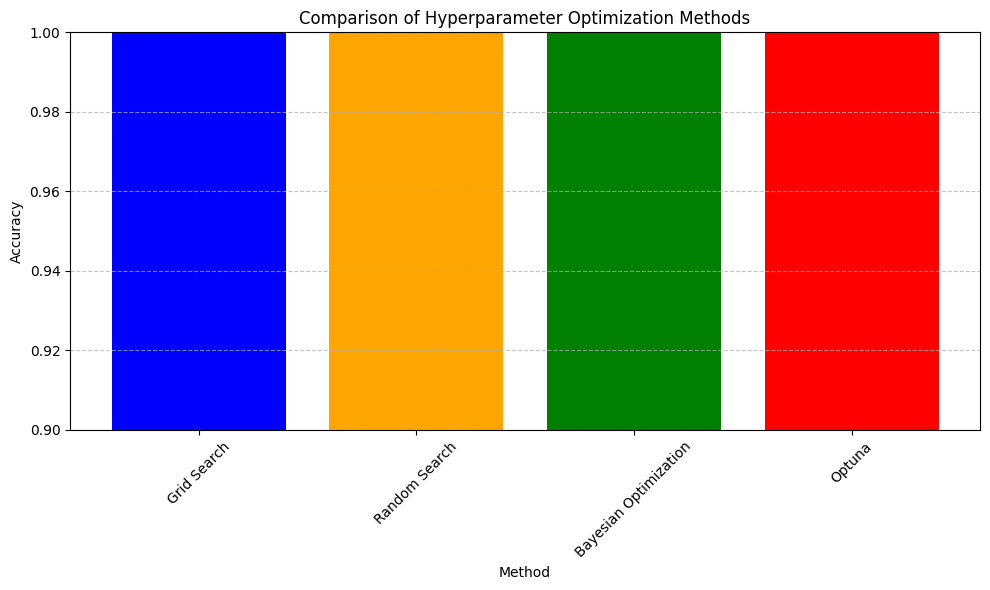

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Accuracy scores obtained from each method
accuracy_scores = {
    'Grid Search': accuracy_grid,
    'Random Search': accuracy_random,
    'Bayesian Optimization': accuracy_bayes,
    'Optuna': accuracy_optuna
}

# Plotting the comparison
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'orange', 'green', 'red'])
plt.title('Comparison of Hyperparameter Optimization Methods')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)  # Set y-axis limits for better visualization
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##Training time

In [ ]:
# Define the objective function for optimization
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 1, 50),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 5),
        'max_features': trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2'])
    }
    # Initialize and train the random forest classifier
    rf_classifier = RandomForestClassifier(**params)
    rf_classifier.fit(X_train, y_train)
    # Calculate accuracy on the test set and return negative value (as Optuna maximizes)
    y_pred = rf_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return -accuracy  # Return negative accuracy score

# Perform Optuna optimization
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Get the best parameters
best_params_optuna = study.best_params
best_model_optuna = RandomForestClassifier(**best_params_optuna)
best_model_optuna.fit(X_train, y_train)

# Evaluate the best model
y_pred_optuna = best_model_optuna.predict(X_test)
accuracy_optuna = accuracy_score(y_test, y_pred_optuna)

# Print the results
print("Accuracy using Optuna:", accuracy_optuna)
print("Best Parameters using Optuna:", best_params_optuna)


In [38]:
import time
from skopt import BayesSearchCV
import optuna

# Define functions for each optimization method
def grid_search_time():
    start_time = time.time()
    GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1).fit(X_train, y_train)
    return time.time() - start_time

def random_search_time():
    start_time = time.time()
    RandomizedSearchCV(estimator=rf_classifier, param_distributions=random_param_grid,
                       n_iter=100, cv=5, random_state=42, n_jobs=-1).fit(X_train, y_train)
    return time.time() - start_time

def bayes_search_time():
    start_time = time.time()
    BayesSearchCV(estimator=rf_classifier, search_spaces=param_space, n_iter=50, cv=5, random_state=42, n_jobs=-1).fit(X_train, y_train)
    return time.time() - start_time

# Perform time comparisons
grid_search_runtime = grid_search_time()
random_search_runtime = random_search_time()
bayes_search_runtime = bayes_search_time()

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


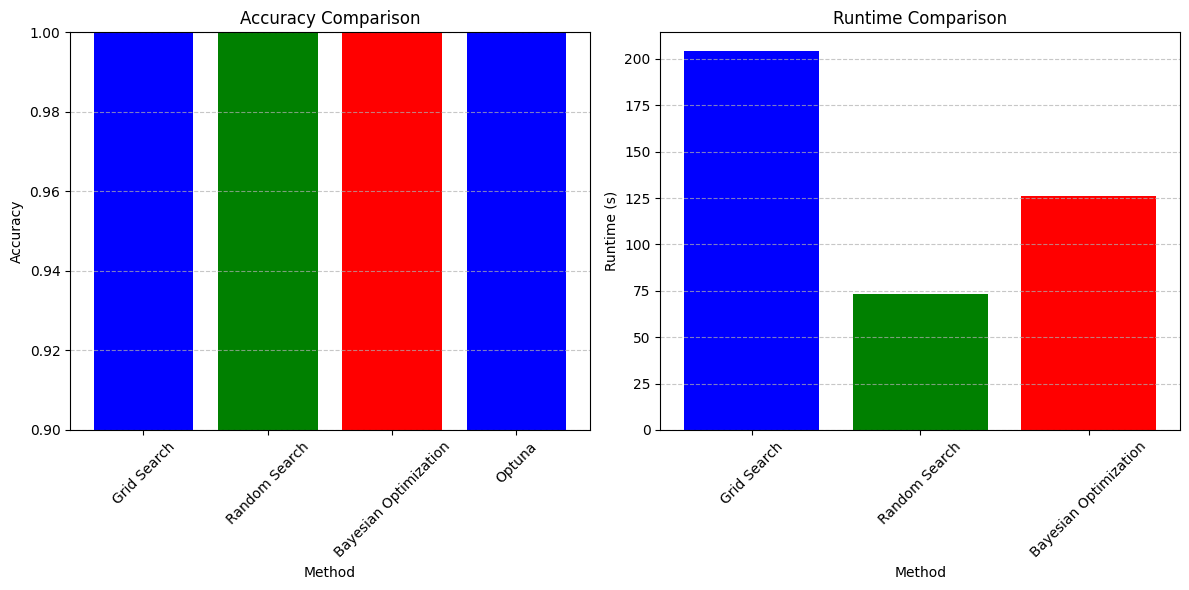

In [40]:
# Plotting the comparison
plt.figure(figsize=(12, 6))

# Accuracy Comparison
plt.subplot(1, 2, 1)
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.title('Accuracy Comparison')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Runtime Comparison
plt.subplot(1, 2, 2)
methods = ['Grid Search', 'Random Search', 'Bayesian Optimization']
runtimes = [grid_search_runtime, random_search_runtime, bayes_search_runtime]
plt.bar(methods, runtimes, color=['blue', 'green', 'red'])
plt.title('Runtime Comparison')
plt.xlabel('Method')
plt.ylabel('Runtime (s)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()